## customet segmentation

Accurate customer segmentation allows marketers to engage with each customer in the most effective way.

## What is customet segmentation?

It is a practice of deviding a company customers into groups that reflect similarity among customers in each group. 
* demographic 
* psycolographic 
* behavioural 
* geographic 

### Advantages of customer segmentation
* price optimization
* enhances competitiveness
* brand awareness
* acquisition and retention
* increase revenue and ROI

### Machine learning model
machine learning customer segmentation allows advanced algorithms to surface insights and groupings that marketers might find difficulty discovering on their own.
 * K-means algorithm

### Exploratory Data Analysis (EDA)
Its goal is to take a look at the raw data that we get, explore it, and gather insights from it that can not only help us make our models better after-hand, but also provide relevant business information derived from this data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

The describe function is mainly use to get information about the numerical variables of our data set. You can see the mean, maximum and minimum values of each of these variables, along with their standard deviation.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Using info(), we can see how many data points and features we have, along with the data types of these features and if they have any missing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop(['CustomerID'],axis =1, inplace = True)

/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

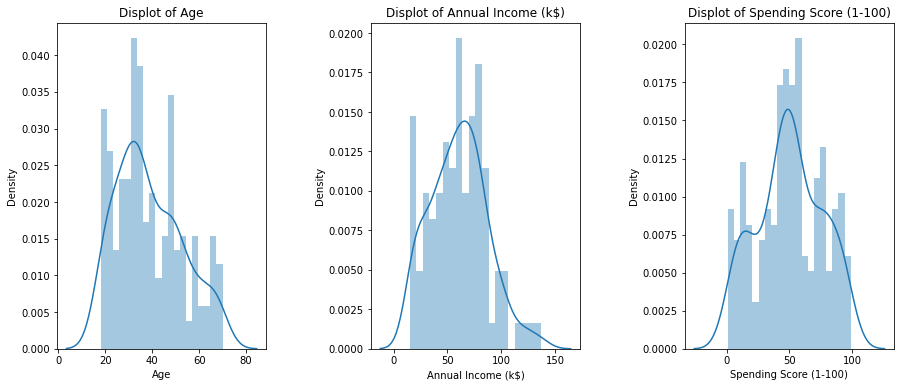

In [9]:
plt.figure(1,figsize=(15,6))
n = 0
for x in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins =20)
    plt.title('Displot of {}'.format(x))
plt.show()

# sns.distplot(df['Age'],bins =20,kde = True)
# plt.title('Displot of {}'.format('Age'))
# plt.show()
# sns.histplot(df['Annual Income (k$)'],bins =20,kde = True)
# plt.title('Displot of {}'.format('Annual Income (k$)'))
# plt.show()
# sns.histplot(df['Spending Score (1-100)'],bins =20,kde = True)
# plt.title('Displot of {}'.format('Spending Score (1-100)'))
# plt.show()

<AxesSubplot:>

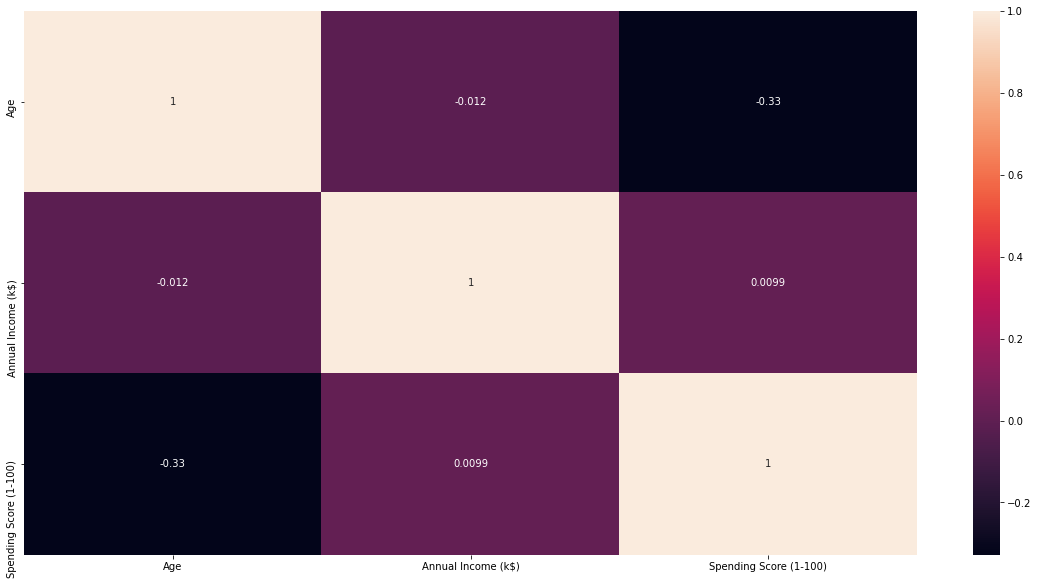

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

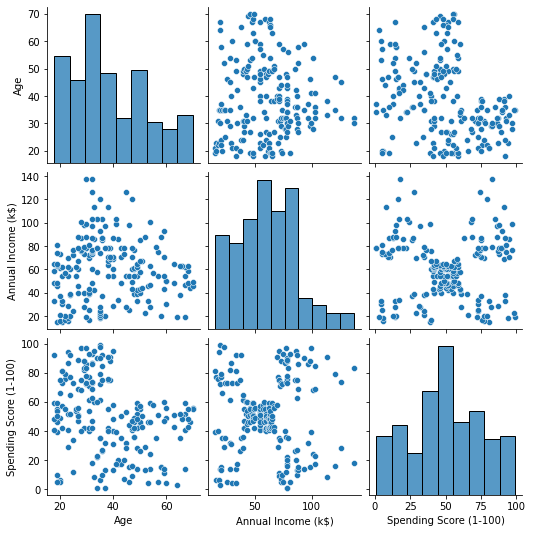

In [11]:
sns.pairplot(df)

Bar charts: visualising quantities associated to different categories

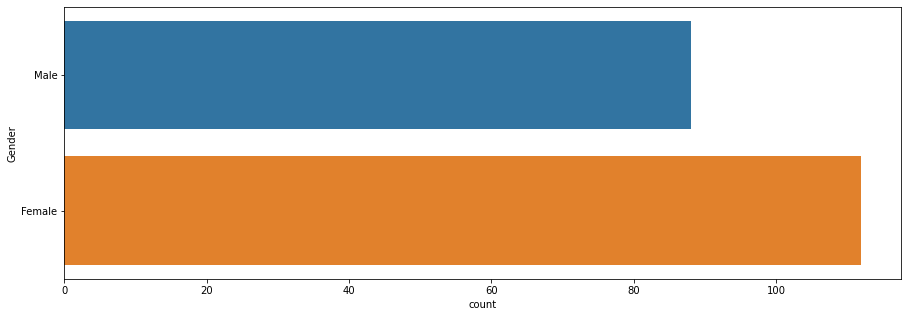

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender',data = df)
plt.show()

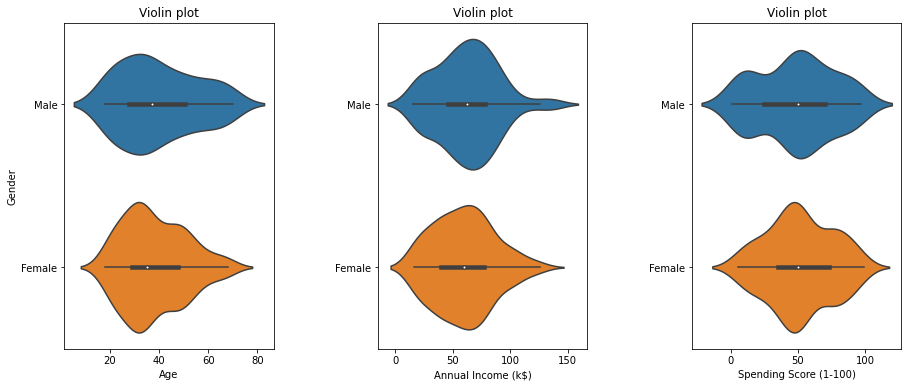

In [13]:
plt.figure(1,figsize=(15,6))
n = 0
for col in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x = col,y ='Gender', data=df)
    plt.title('Violin plot')
    plt.ylabel('Gender' if n==1 else '')
plt.show()

In [14]:
age_18_25 = df.Age[(df.Age >=18)&(df.Age<=25)]
age_26_35 = df.Age[(df.Age >=26)&(df.Age<=35)]
age_36_45 = df.Age[(df.Age >=36)&(df.Age<=45)]
age_46_55 = df.Age[(df.Age >=46)&(df.Age<=55)]
age_55above = df.Age[df.Age >=56]

In [15]:
agex=['18-25','26-35','36-45','46-55','55+']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

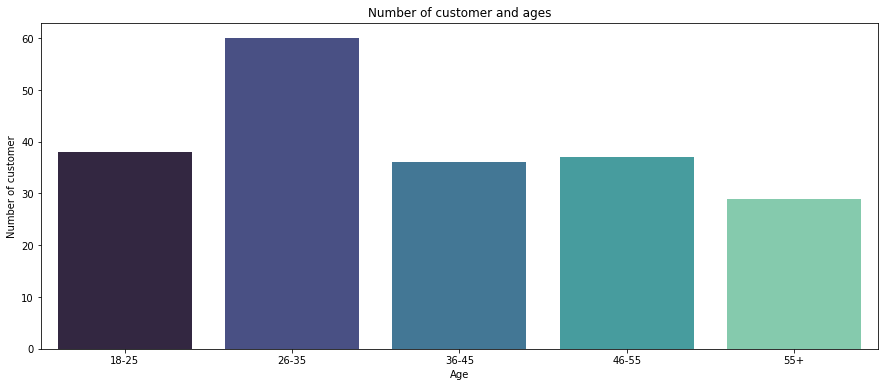

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x = agex,y=agey,palette='mako')
plt.title('Number of customer and ages')
plt.xlabel('Age')
plt.ylabel('Number of customer')
plt.show()

Scatter plots summary: scatter plots are a great way to visualise the relationship between two continuous numerical variables. Avoid using them when the variable, despite being numeric, has a very limited value range.

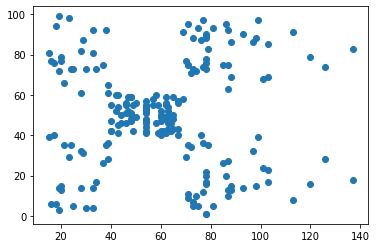

In [17]:
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=df)

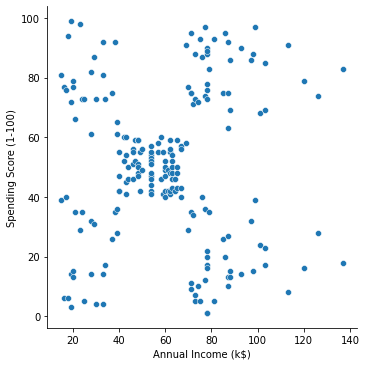

In [18]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=df)

In [19]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61)&(df['Spending Score (1-100)']<=80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81)&(df['Spending Score (1-100)']<=100)]

In [20]:
ssx = ['1-20','21-40','41-60','61-80','81-100']
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

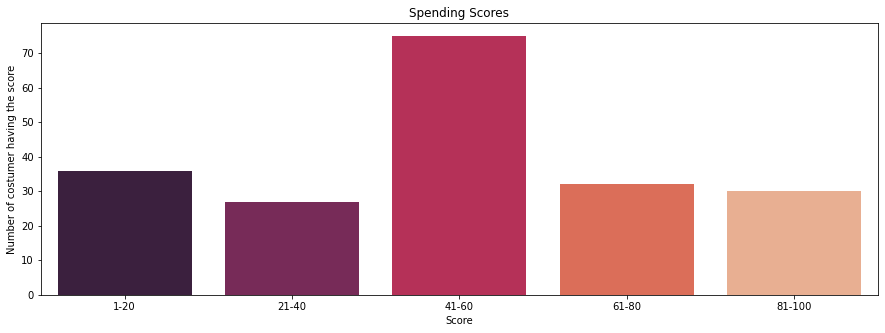

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of costumer having the score')
plt.show()

In [22]:
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=0)&(df['Annual Income (k$)']<=30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=31)&(df['Annual Income (k$)']<=60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=61)&(df['Annual Income (k$)']<=90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=91)&(df['Annual Income (k$)']<=120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

In [23]:
aix =['$0-30000','$30001-60000','$60001-90000','$90001-120000','$120001-150000']
aiy = [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

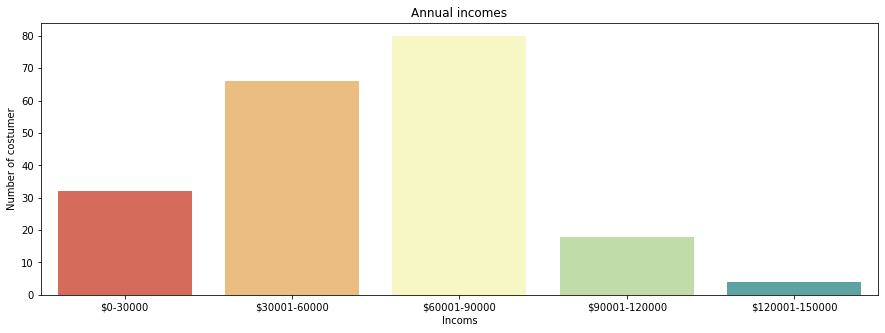

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title('Annual incomes')
plt.xlabel('Incoms')
plt.ylabel('Number of costumer')
plt.show()

 box plots allow us to quickly see statistical values of our numerical variables, and seamlessly detect if there are any outliers without the need to execute complex algorithms.

In [83]:
df["Age_category"] = df['Age'].apply(lambda x: 'Senior Citizen' if x >= 55 else 'Adult' if x > 25 else 'Youth')

In [55]:
df["Age_category"] = df['Age'].apply(lambda x: '55-70' if x >= 55 else '46-55' if  x > 45 else '36-45' if x > 35 else '26-35' if  x > 25 else '18-25')



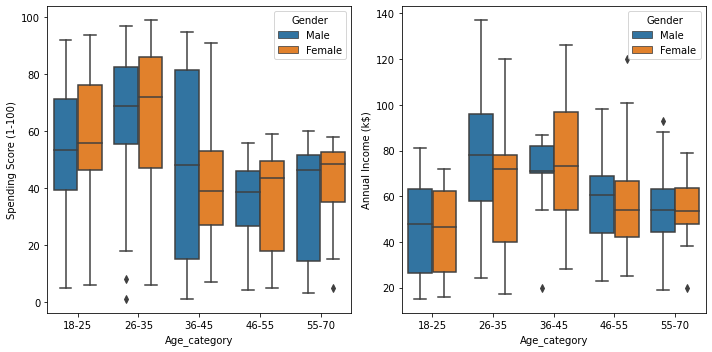

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"],x=df['Age_category'].sort_values(),hue = df['Gender'])
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],x=df['Age_category'].sort_values(),hue = df['Gender'])
plt.tight_layout()

<AxesSubplot:xlabel='Age_category', ylabel='count'>

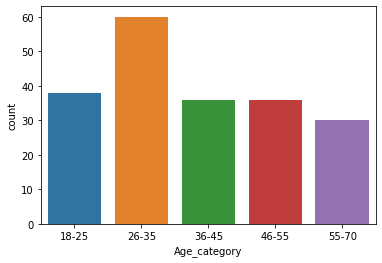

In [59]:
sns.countplot(x=df["Age_category"].sort_values())

In [79]:
test_f = df[(df["Age_category"]=='26-35')&(df['Gender']=='Female')]
test_m = df[(df["Age_category"]=='26-35')&(df['Gender']=='Male')]

/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/elham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

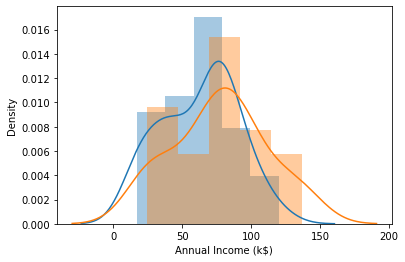

In [80]:
sns.distplot(test_f['Annual Income (k$)'])
sns.distplot(test_m['Annual Income (k$)'])

In [54]:
x1 = df.loc[:,['Age','Spending Score (1-100)']].values

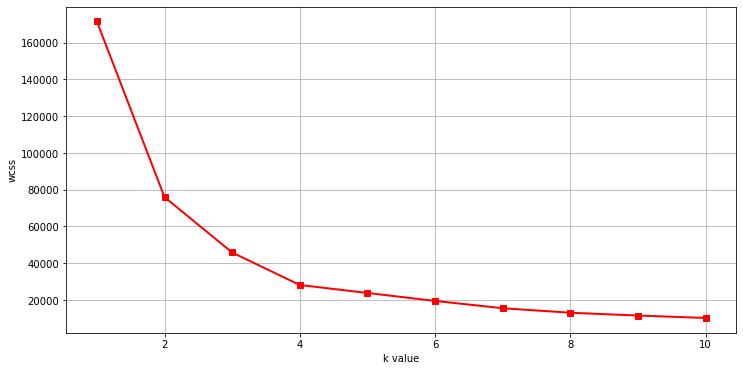

In [55]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='s')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)

[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [57]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


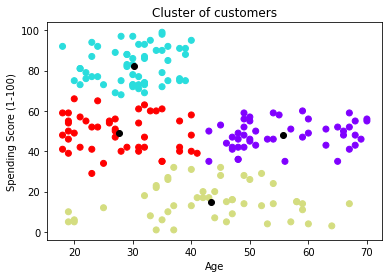

In [59]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

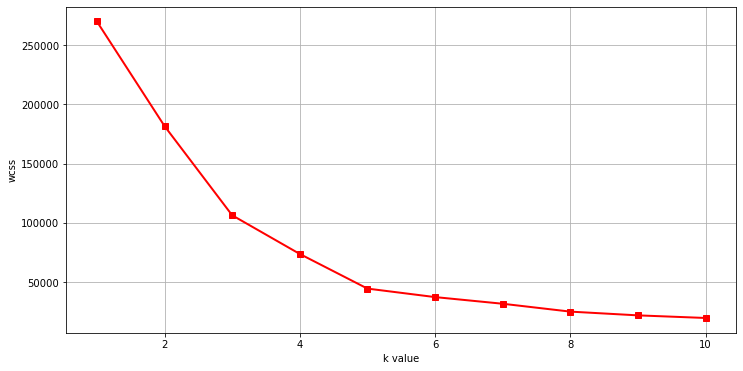

In [64]:
x2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='s')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 1 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [66]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


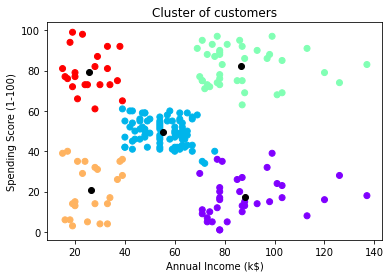

In [68]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

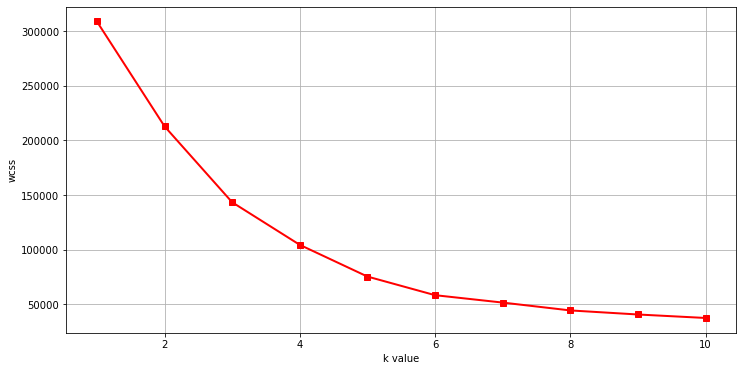

In [69]:
x3 = df.iloc[:,1:]
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='s')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x3)
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [71]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]
 [43.72727273 55.48051948 49.32467532]
 [24.96       28.04       77.        ]]


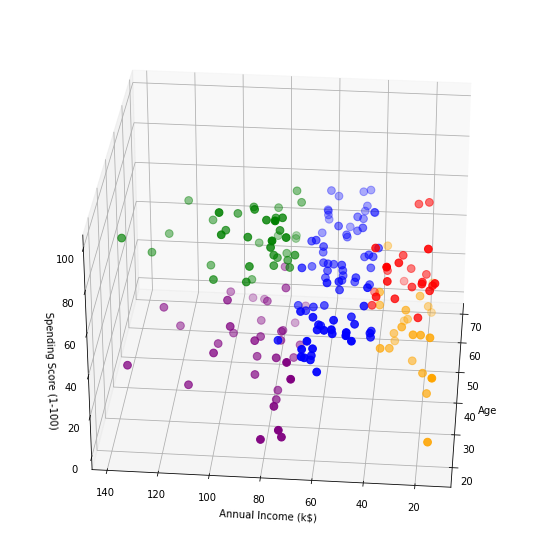

In [72]:
clusters = kmeans.fit_predict(x3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c = 'blue',s=60)
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c = 'red',s=60)
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c = 'green',s=60)
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c = 'orange',s=60)
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c = 'purple',s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()